In [1]:
import torch
import numpy as np
import random
import PIL
from PIL import Image
from torch.utils.data import DataLoader
import torchvision.transforms.functional as functional
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import cv2

from loading_data import load_viz_data

0.8394385668255744


/home/sposhiya/anaconda3/envs/pytorch/lib/python3.12/site-packages/torch/nn/functional.py:4158: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")


torch.Size([1, 16, 3, 512, 512])
torch.Size([1, 79, 2])
torch.Size([1, 79, 2])
torch.Size([1, 79, 2])
torch.Size([1, 79, 2])
torch.Size([1, 74, 2])
torch.Size([1, 74, 2])
torch.Size([1, 74, 2])
torch.Size([1, 74, 2])
torch.Size([1, 46, 2])
torch.Size([1, 46, 2])
torch.Size([1, 46, 2])
torch.Size([1, 46, 2])
torch.Size([1, 46, 2])
torch.Size([1, 46, 2])
torch.Size([1, 46, 2])
torch.Size([1, 46, 2])


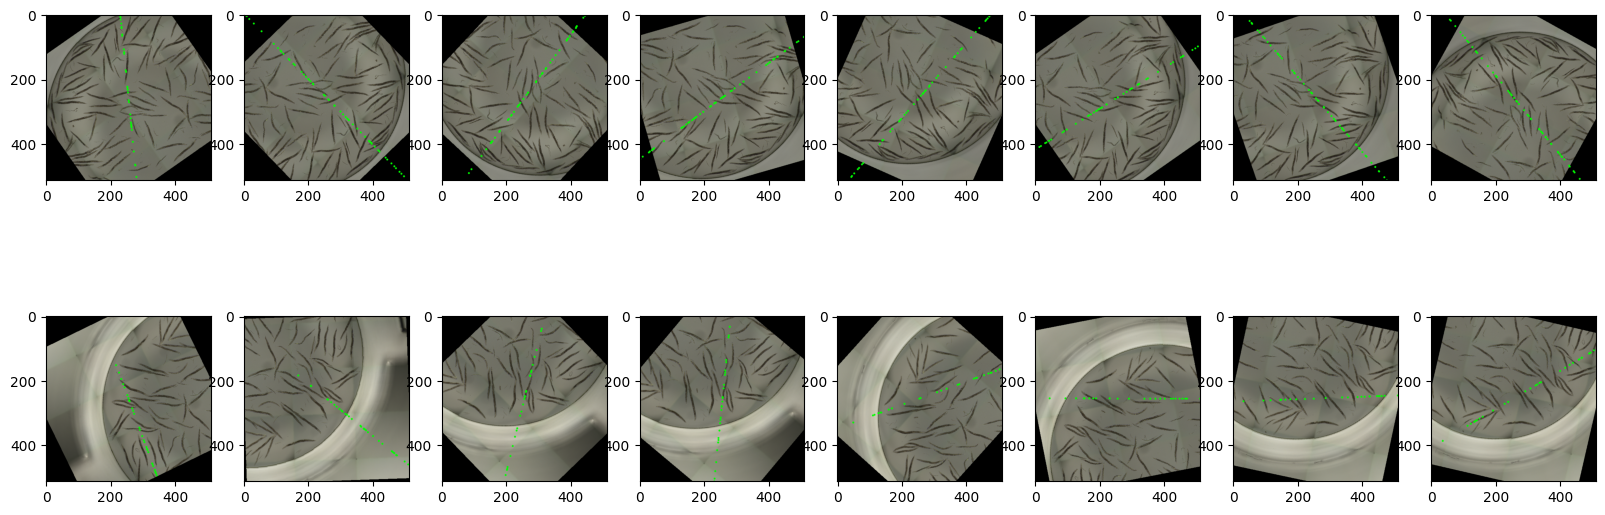

In [2]:
train_set, val_set = load_viz_data("/home/sposhiya/Documents/TumorAI/CrowdCounting-P2PNet/dataroot/resize_multiclass")

dataloader_train = DataLoader(train_set, batch_size=1)

example = next(iter(dataloader_train))
img, target = example

print(img.size())
for tar in target: 
    print(tar["point"].size())

# actual viz
fig = plt.figure(figsize=(20, 15))
img = img.squeeze(0)
for i, image in enumerate(img):
    
    image = functional.to_pil_image(image)
    for z in range(target[i]["point"].size()[1]):
        point = target[i]["point"][0][z]
        image = cv2.circle(np.array(image), (int(point[0]), int(point[1])), 3, (0,255,0), -1)
    fig.add_subplot(4,8,i+1)
    plt.imshow(image)
